<a href="https://colab.research.google.com/github/wuame/ENSIAS/blob/master/tp_ANN_with_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Artificial Neural Networks with Keras

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/AbdelMahm/INPT-2020/blob/master/Notebooks_DL/ANN_with_keras.ipynb"><img src="https://colab.research.google.com/img/colab_favicon_256px.png" />Run in Google Colab</a>
  </td>
</table>

# Setup

In [157]:
#Firstly, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20 and TensorFlow ≥2.0.

In [1]:
# TensorFlow ≥2.0 is required
import tensorflow as tf

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Building an Image Classifier

First let's import TensorFlow and Keras.

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
tf.__version__

'2.3.0'

Let's start by loading the fashion MNIST dataset. Keras has a number of functions to load popular datasets in `keras.datasets`. The dataset is already split for you between a training set and a test set, but it can be useful to split the training set further to have a validation set:

In [158]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

The training set contains 60,000 grayscale images, each 28x28 pixels:

In [159]:
X_train_full.shape

(60000, 28, 28)

Each pixel intensity is represented as a byte (0 to 255):

In [160]:
X_train_full.dtype

dtype('uint8')

Let's split the full training set into a validation set and a (smaller) training set. We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255.

In [161]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

You can plot an image using Matplotlib's `imshow()` function, with a `'binary'`
 color map:

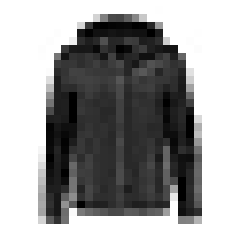

In [162]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

The labels are the class IDs (represented as uint8), from 0 to 9:

In [163]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

Here are the corresponding class names:

In [164]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

So the first image in the training set is a coat:

In [166]:
class_names[y_train[0]]

'Coat'

The validation set contains 5,000 images, and the test set contains 10,000 images:

In [167]:
X_valid.shape

(5000, 28, 28)

In [168]:
X_test.shape

(10000, 28, 28)

Let's take a look at a sample of the images in the dataset:

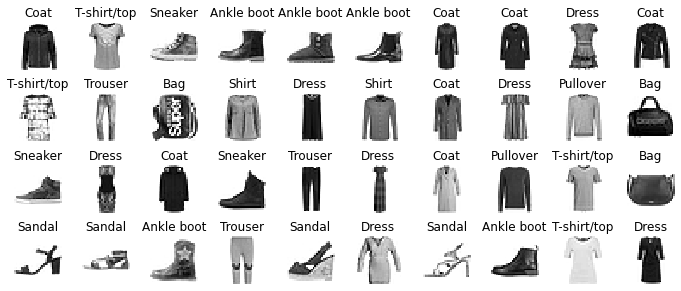

In [169]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## Construct a Model

In [175]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [172]:
keras.backend.clear_session()
np.random.seed(42)

### or using the folowing method

In [173]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model.layers

In [176]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#keras.utils.plot_model(model, "my_mnist_model.png", show_shapes=True)

In [177]:
hidden1 = model.layers[1]
hidden1.name

'dense_3'

In [178]:
model.get_layer(hidden1.name) is hidden1

True

In [ ]:
weights, biases = hidden1.get_weights()

In [ ]:
weights

array([[-0.01561847,  0.01209605,  0.03435539, ...,  0.06374571,
        -0.07172661, -0.06482527],
       [ 0.01086314, -0.03716286,  0.07362576, ...,  0.04288747,
        -0.05227236, -0.04290539],
       [ 0.06189211,  0.00100185, -0.03547051, ..., -0.03245765,
         0.07175595, -0.03689477],
       ...,
       [-0.03211316,  0.06757252,  0.07022759, ...,  0.00790117,
         0.00915641, -0.05930692],
       [-0.02232986,  0.05836897, -0.05928787, ...,  0.02014921,
        -0.01327395,  0.05234121],
       [-0.06090333, -0.04105648, -0.05494909, ..., -0.02617657,
        -0.07270457,  0.01442105]], dtype=float32)

In [ ]:
weights.shape

(784, 300)

In [ ]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
biases.shape

(300,)

### Compile the Model
Here you can chose the loss function, the optimizer, the performance metric, etc. check Keras documentation for further details.

In [180]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

This is equivalent to:

```python
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])
```

### Train the model
Here you can chose how many epochs you need and the batch size.

In [181]:
history = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7091 - accuracy: 0.7691 - val_loss: 0.5066 - val_accuracy: 0.8292
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4871 - accuracy: 0.8299 - val_loss: 0.4351 - val_accuracy: 0.8550
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4433 - accuracy: 0.8445 - val_loss: 0.4097 - val_accuracy: 0.8632
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4155 - accuracy: 0.8536 - val_loss: 0.3997 - val_accuracy: 0.8658
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3951 - accuracy: 0.8609 - val_loss: 0.3827 - val_accuracy: 0.8696
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3789 - accuracy: 0.8656 - val_loss: 0.3770 - val_accuracy: 0.8678
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3656 - accuracy: 0.8713 - val_loss: 0.3707 - val_accuracy:

In [ ]:
history.params

{'epochs': 30, 'steps': 1719, 'verbose': 1}

In [ ]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### Plot learning Curves

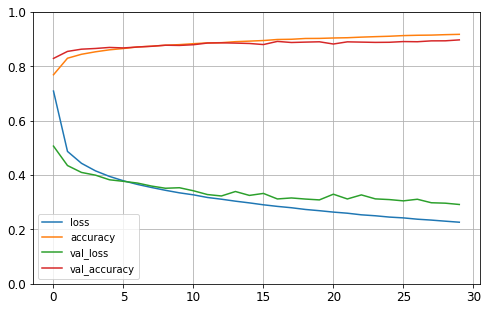

In [182]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3479 - accuracy: 0.8777


[0.34789085388183594, 0.8776999711990356]

In [ ]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.03, 0.  , 0.97],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [ ]:
y_pred = model.predict_classes(X_new)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1])

In [ ]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [ ]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

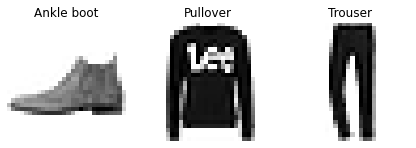

In [ ]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## Exercise

#### 1) Plot Learning curves when using different optimizers
#### 2) Plot Learning curves when using different batch size
#### 3) Plot Learning curves when using different number of epochs
#### 4) Add additional neurons and use Dropout Layer. Plot Learning curves.
#### 5) Use Batch Normalisation
#### 6) repeat with more layers
#### 7) apply on different datasets

Epoch 1/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4880 - accuracy: 0.8228 - val_loss: 0.3762 - val_accuracy: 0.8640
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3649 - accuracy: 0.8661 - val_loss: 0.3550 - val_accuracy: 0.8724
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3270 - accuracy: 0.8788 - val_loss: 0.3285 - val_accuracy: 0.8788
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3013 - accuracy: 0.8882 - val_loss: 0.3199 - val_accuracy: 0.8816
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2867 - accuracy: 0.8922 - val_loss: 0.3225 - val_accuracy: 0.8826
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2718 - accuracy: 0.8973 - val_loss: 0.3247 - val_accuracy: 0.8818
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2590 - accuracy: 0.9030 - val_loss: 0.2960 - val_accuracy:

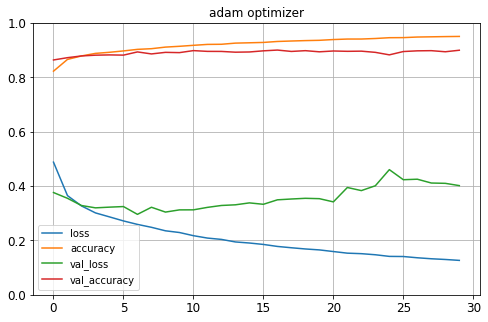

In [183]:
#Question 1
#using ADAM optimizer 
from keras import backend as K
K.clear_session() # it will destroy keras object
def build_model():
  model = keras.models.Sequential()
  model.add(keras.layers.Flatten(input_shape=[28, 28]))
  model.add(keras.layers.Dense(300, activation="relu"))
  model.add(keras.layers.Dense(100, activation="relu"))
  model.add(keras.layers.Dense(10, activation="softmax"))
  return model
model_adam=build_model()
model_adam.compile(loss="sparse_categorical_crossentropy", optimizer="adam",metrics=["accuracy"])
history_adam = model_adam.fit(X_train, y_train, batch_size=32, epochs=30, validation_data=(X_valid, y_valid))
history_adam.history.keys()
pd.DataFrame(history_adam.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.title("adam optimizer")
plt.show()

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5136 - accuracy: 0.8208 - val_loss: 0.3994 - val_accuracy: 0.8594
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3828 - accuracy: 0.8631 - val_loss: 0.3567 - val_accuracy: 0.8746
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3442 - accuracy: 0.8748 - val_loss: 0.3445 - val_accuracy: 0.8766
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3196 - accuracy: 0.8828 - val_loss: 0.3258 - val_accuracy: 0.8816
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2993 - accuracy: 0.8904 - val_loss: 0.3171 - val_accuracy: 0.8838
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2851 - accuracy: 0.8945 - val_loss: 0.3150 - val_accuracy: 0.8844
Epoch 7/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2715 - accuracy: 0.8995 - val_loss: 0.2934 - val_accuracy:

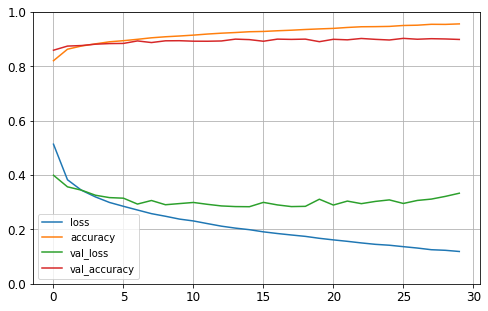

In [ ]:
#Question 1
#using ADAMAX optimizer 
K.clear_session() 
model_adamax=build_model()

model_adamax.compile(loss="sparse_categorical_crossentropy", optimizer="Adamax", metrics=["accuracy"])
history_adamax = model_adamax.fit(X_train, y_train, batch_size=32, epochs=30,validation_data=(X_valid, y_valid))
history_adamax.history.keys()

pd.DataFrame(history_adamax.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.title("ADAMAX optimizer")
plt.show()

Epoch 1/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.5029 - accuracy: 0.8182 - val_loss: 0.3995 - val_accuracy: 0.8612
Epoch 2/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3913 - accuracy: 0.8604 - val_loss: 0.3781 - val_accuracy: 0.8730
Epoch 3/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3668 - accuracy: 0.8724 - val_loss: 0.3964 - val_accuracy: 0.8746
Epoch 4/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3582 - accuracy: 0.8776 - val_loss: 0.4147 - val_accuracy: 0.8728
Epoch 5/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3468 - accuracy: 0.8801 - val_loss: 0.3949 - val_accuracy: 0.8826
Epoch 6/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3372 - accuracy: 0.8843 - val_loss: 0.4143 - val_accuracy: 0.8814
Epoch 7/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.3310 - accuracy: 0.8887 - val_loss: 0.4204 - val_accuracy:

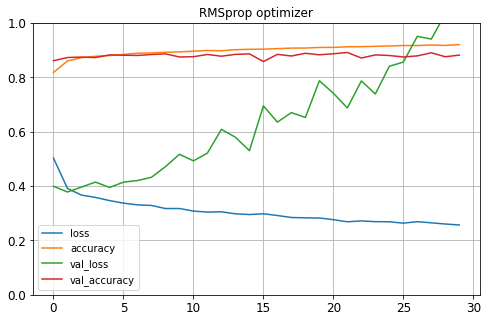

In [186]:
#Question 1
#using RMSprop optimizer 
K.clear_session() 
np.random.seed(42)

model_RMSprop=build_model()
model_RMSprop.compile(loss="sparse_categorical_crossentropy",optimizer="RMSprop",metrics=["accuracy"])
history_RMSprop = model_RMSprop.fit(X_train, y_train, batch_size=32, epochs=30,validation_data=(X_valid, y_valid))
history_RMSprop.history.keys()

pd.DataFrame(history_RMSprop.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.title("RMSprop optimizer")
plt.show()

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 2.0793 - accuracy: 0.2887 - val_loss: 1.8783 - val_accuracy: 0.4268
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 1.7220 - accuracy: 0.5262 - val_loss: 1.5756 - val_accuracy: 0.6168
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 1.4656 - accuracy: 0.6376 - val_loss: 1.3506 - val_accuracy: 0.6660
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 1.2745 - accuracy: 0.6712 - val_loss: 1.1848 - val_accuracy: 0.6886
Epoch 5/30
1719/1719 [==============================] - 8s 5ms/step - loss: 1.1347 - accuracy: 0.6925 - val_loss: 1.0651 - val_accuracy: 0.7084
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 1.0328 - accuracy: 0.7095 - val_loss: 0.9779 - val_accuracy: 0.7222
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.9574 - accuracy: 0.7238 - val_loss: 0.9119 - val_accuracy:

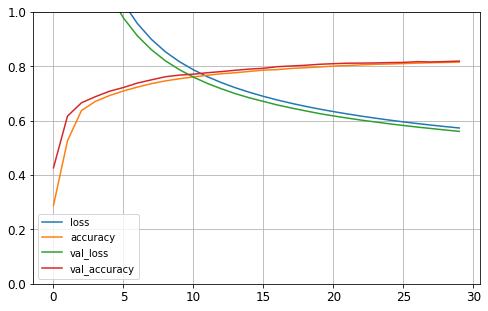

In [ ]:
#Question 1
#using ADADELTA optimizer 

K.clear_session() 

model_ADADELTA=build_model()

model_ADADELTA.compile(loss="sparse_categorical_crossentropy",
              optimizer="Adadelta",
              metrics=["accuracy"])
history_ADADELTA = model_ADADELTA.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))
history_ADADELTA.history.keys()

pd.DataFrame(history_ADADELTA.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.title("ADADELTA optimizer")
plt.show()

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 1.0952 - accuracy: 0.6640 - val_loss: 0.7432 - val_accuracy: 0.7608
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.6860 - accuracy: 0.7748 - val_loss: 0.6245 - val_accuracy: 0.7950
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.6048 - accuracy: 0.8031 - val_loss: 0.5690 - val_accuracy: 0.8150
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5614 - accuracy: 0.8148 - val_loss: 0.5348 - val_accuracy: 0.8258
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5339 - accuracy: 0.8236 - val_loss: 0.5121 - val_accuracy: 0.8316
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5139 - accuracy: 0.8287 - val_loss: 0.4954 - val_accuracy: 0.8360
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4988 - accuracy: 0.8338 - val_loss: 0.4842 - val_accuracy:

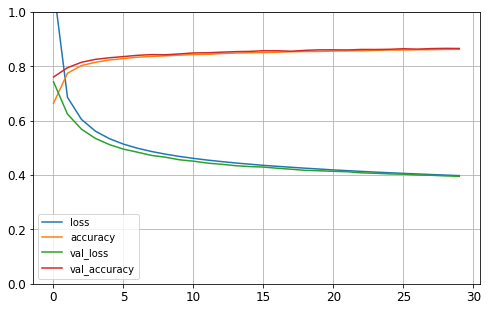

In [ ]:
#Question 1
#using ADAGRAD optimizer 

K.clear_session() 

model_ADAGRAD=build_model()

model_ADAGRAD.compile(loss="sparse_categorical_crossentropy",optimizer="Adagrad",metrics=["accuracy"])
history_ADAGRAD = model_ADAGRAD.fit(X_train, y_train, batch_size=32, epochs=30,validation_data=(X_valid, y_valid))
history_ADAGRAD.history.keys()

pd.DataFrame(history_ADAGRAD.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.title("ADAGRAD optimizer")
plt.show()


Epoch 1/30
1719/1719 [==============================] - 11s 7ms/step - loss: 0.4733 - accuracy: 0.8294 - val_loss: 0.3849 - val_accuracy: 0.8548
Epoch 2/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3527 - accuracy: 0.8697 - val_loss: 0.3568 - val_accuracy: 0.8686
Epoch 3/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3165 - accuracy: 0.8823 - val_loss: 0.3119 - val_accuracy: 0.8846
Epoch 4/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.2940 - accuracy: 0.8900 - val_loss: 0.3108 - val_accuracy: 0.8848
Epoch 5/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.2771 - accuracy: 0.8968 - val_loss: 0.3175 - val_accuracy: 0.8866
Epoch 6/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.2607 - accuracy: 0.9031 - val_loss: 0.2955 - val_accuracy: 0.8922
Epoch 7/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.2489 - accuracy: 0.9061 - val_loss: 0.3033 - val_ac

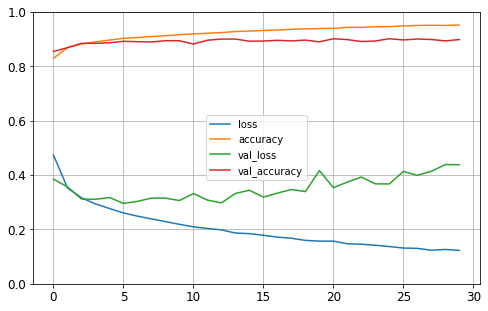

In [ ]:
#Question 1
#using NADAM optimizer 

K.clear_session() 

model_NADAM=build_model()

model_NADAM.compile(loss="sparse_categorical_crossentropy",optimizer="Nadam", metrics=["accuracy"])

history_NADAM = model_NADAM.fit(X_train, y_train, batch_size=32, epochs=30, validation_data=(X_valid, y_valid))
history_NADAM.history.keys()


pd.DataFrame(history_NADAM.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.title("NADAM optimizer")
plt.show()


Epoch 1/30
860/860 [==============================] - 5s 6ms/step - loss: 0.8710 - accuracy: 0.7197 - val_loss: 0.5995 - val_accuracy: 0.7980
Epoch 2/30
860/860 [==============================] - 4s 4ms/step - loss: 0.5559 - accuracy: 0.8108 - val_loss: 0.5075 - val_accuracy: 0.8258
Epoch 3/30
860/860 [==============================] - 4s 4ms/step - loss: 0.4948 - accuracy: 0.8281 - val_loss: 0.4767 - val_accuracy: 0.8400
Epoch 4/30
860/860 [==============================] - 3s 4ms/step - loss: 0.4652 - accuracy: 0.8365 - val_loss: 0.4356 - val_accuracy: 0.8546
Epoch 5/30
860/860 [==============================] - 4s 4ms/step - loss: 0.4436 - accuracy: 0.8451 - val_loss: 0.4385 - val_accuracy: 0.8502
Epoch 6/30
860/860 [==============================] - 3s 4ms/step - loss: 0.4273 - accuracy: 0.8498 - val_loss: 0.4787 - val_accuracy: 0.8362
Epoch 7/30
860/860 [==============================] - 4s 4ms/step - loss: 0.4127 - accuracy: 0.8541 - val_loss: 0.4496 - val_accuracy: 0.8408
Epoch 

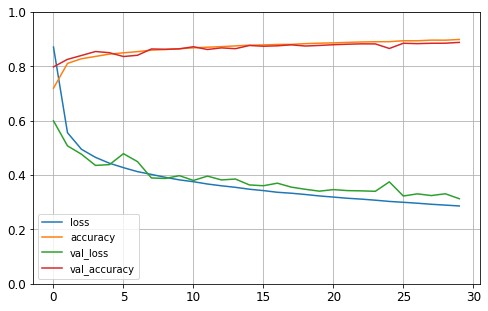

In [35]:
#Question 2
#using batch size=64
K.clear_session() 
model_2=build_model()
model_2.compile(loss="sparse_categorical_crossentropy", optimizer="sgd",metrics=["accuracy"])
history_2 = model_2.fit(X_train, y_train, batch_size=64, epochs=30, validation_data=(X_valid, y_valid))
history_2.history.keys()
import pandas as pd
pd.DataFrame(history_2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()


Epoch 1/30
550/550 [==============================] - 3s 5ms/step - loss: 0.9754 - accuracy: 0.6982 - val_loss: 0.6465 - val_accuracy: 0.7946
Epoch 2/30
550/550 [==============================] - 3s 5ms/step - loss: 0.5960 - accuracy: 0.8038 - val_loss: 0.5441 - val_accuracy: 0.8190
Epoch 3/30
550/550 [==============================] - 3s 5ms/step - loss: 0.5244 - accuracy: 0.8231 - val_loss: 0.4824 - val_accuracy: 0.8388
Epoch 4/30
550/550 [==============================] - 3s 5ms/step - loss: 0.4888 - accuracy: 0.8331 - val_loss: 0.4577 - val_accuracy: 0.8470
Epoch 5/30
550/550 [==============================] - 3s 5ms/step - loss: 0.4642 - accuracy: 0.8399 - val_loss: 0.4632 - val_accuracy: 0.8398
Epoch 6/30
550/550 [==============================] - 3s 5ms/step - loss: 0.4478 - accuracy: 0.8439 - val_loss: 0.4347 - val_accuracy: 0.8518
Epoch 7/30
550/550 [==============================] - 3s 5ms/step - loss: 0.4335 - accuracy: 0.8493 - val_loss: 0.4224 - val_accuracy: 0.8568
Epoch 

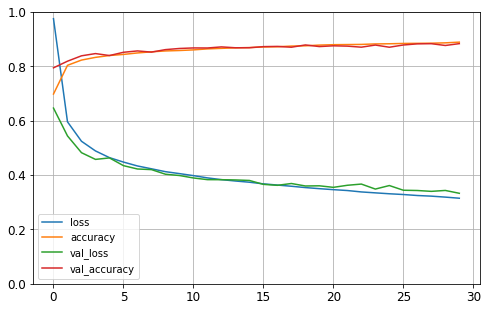

In [37]:
#Question 2
#using batch size=100

K.clear_session() 
model_3=build_model()
model_3.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
history_3 = model_3.fit(X_train, y_train, batch_size=100, epochs=30,
                    validation_data=(X_valid, y_valid))
history_3.history.keys()


pd.DataFrame(history_3.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()


Epoch 1/30
2750/2750 [==============================] - 7s 3ms/step - loss: 0.6654 - accuracy: 0.7765 - val_loss: 0.4928 - val_accuracy: 0.8332
Epoch 2/30
2750/2750 [==============================] - 7s 3ms/step - loss: 0.4659 - accuracy: 0.8366 - val_loss: 0.4236 - val_accuracy: 0.8554
Epoch 3/30
2750/2750 [==============================] - 8s 3ms/step - loss: 0.4214 - accuracy: 0.8519 - val_loss: 0.4177 - val_accuracy: 0.8570
Epoch 4/30
2750/2750 [==============================] - 8s 3ms/step - loss: 0.3931 - accuracy: 0.8595 - val_loss: 0.3663 - val_accuracy: 0.8746
Epoch 5/30
2750/2750 [==============================] - 8s 3ms/step - loss: 0.3719 - accuracy: 0.8672 - val_loss: 0.3573 - val_accuracy: 0.8770
Epoch 6/30
2750/2750 [==============================] - 8s 3ms/step - loss: 0.3546 - accuracy: 0.8742 - val_loss: 0.3647 - val_accuracy: 0.8736
Epoch 7/30
2750/2750 [==============================] - 8s 3ms/step - loss: 0.3396 - accuracy: 0.8783 - val_loss: 0.3417 - val_accuracy:

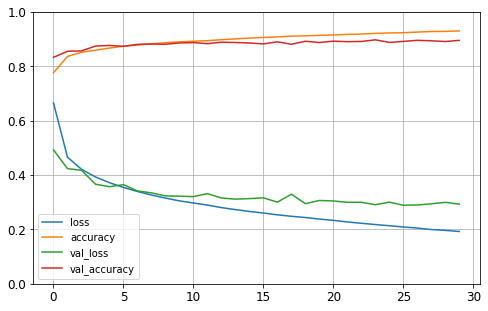

In [38]:
#Question 2
#using batch size=20

K.clear_session() 
model_4=build_model()
model_4.compile(loss="sparse_categorical_crossentropy",optimizer="sgd", metrics=["accuracy"])
history_4 = model_4.fit(X_train, y_train, batch_size=20, epochs=30,validation_data=(X_valid, y_valid))
history_4.history.keys()
pd.DataFrame(history_4.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()


Epoch 1/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7179 - accuracy: 0.7659 - val_loss: 0.5016 - val_accuracy: 0.8334
Epoch 2/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4869 - accuracy: 0.8303 - val_loss: 0.4920 - val_accuracy: 0.8330
Epoch 3/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4421 - accuracy: 0.8451 - val_loss: 0.4149 - val_accuracy: 0.8530
Epoch 4/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4149 - accuracy: 0.8546 - val_loss: 0.4016 - val_accuracy: 0.8656
Epoch 5/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3942 - accuracy: 0.8615 - val_loss: 0.3868 - val_accuracy: 0.8664
Epoch 6/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3776 - accuracy: 0.8653 - val_loss: 0.3911 - val_accuracy: 0.8610
Epoch 7/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3640 - accuracy: 0.8700 - val_loss: 0.3582 - val_accuracy:

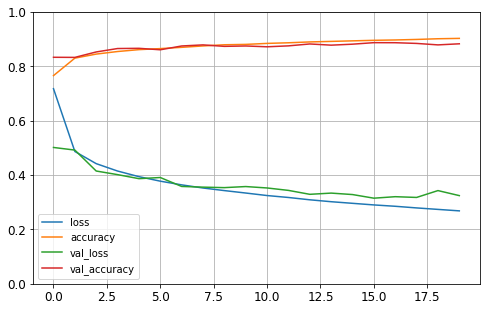

In [39]:
#Question 3
#using batch size=32 and  number of epochs=20
K.clear_session() 
modela=build_model()
modela.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])
historya = modela.fit(X_train, y_train, batch_size=32, epochs=20,validation_data=(X_valid, y_valid))
historya.history.keys()

pd.DataFrame(historya.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()


Epoch 1/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7179 - accuracy: 0.7661 - val_loss: 0.5189 - val_accuracy: 0.8240
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4884 - accuracy: 0.8284 - val_loss: 0.4646 - val_accuracy: 0.8436
Epoch 3/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4446 - accuracy: 0.8432 - val_loss: 0.4496 - val_accuracy: 0.8336
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4176 - accuracy: 0.8534 - val_loss: 0.4034 - val_accuracy: 0.8634
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3974 - accuracy: 0.8595 - val_loss: 0.3903 - val_accuracy: 0.8630
Epoch 6/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3817 - accuracy: 0.8658 - val_loss: 0.3951 - val_accuracy: 0.8618
Epoch 7/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3682 - accuracy: 0.8699 - val_loss: 0.3879 - val_accuracy:

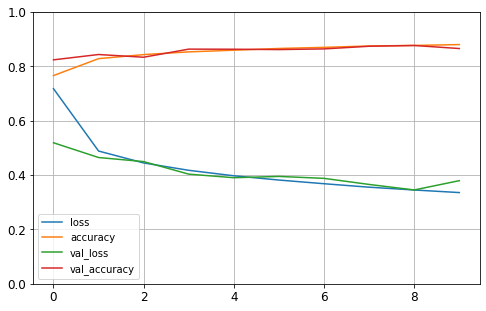

In [40]:
#Question 3
#using batch size=32 and  number of epochs=10
K.clear_session() 
modelb=build_model()
modelb.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])
historyb = modelb.fit(X_train, y_train, batch_size=32, epochs=10,validation_data=(X_valid, y_valid))
historyb.history.keys()
pd.DataFrame(historyb.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()


Epoch 1/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7213 - accuracy: 0.7644 - val_loss: 0.5116 - val_accuracy: 0.8276
Epoch 2/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4907 - accuracy: 0.8283 - val_loss: 0.4743 - val_accuracy: 0.8342
Epoch 3/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4466 - accuracy: 0.8433 - val_loss: 0.4270 - val_accuracy: 0.8544
Epoch 4/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4200 - accuracy: 0.8508 - val_loss: 0.4057 - val_accuracy: 0.8564
Epoch 5/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4004 - accuracy: 0.8598 - val_loss: 0.3872 - val_accuracy: 0.8674
Epoch 6/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3844 - accuracy: 0.8649 - val_loss: 0.3804 - val_accuracy: 0.8688
Epoch 7/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3704 - accuracy: 0.8695 - val_loss: 0.3969 - val_ac

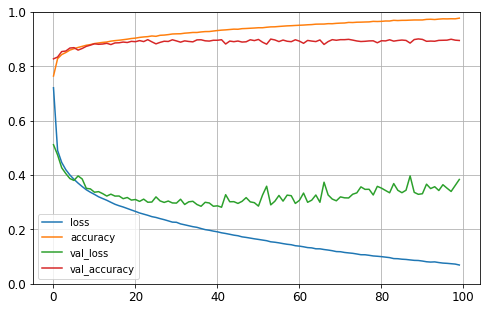

In [41]:
#Question 3
#using batch size=32 and  number of epochs=100
K.clear_session() 
modelc=build_model()
modelc.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])
historyc = modelc.fit(X_train, y_train, batch_size=32, epochs=100,validation_data=(X_valid, y_valid))
historyc.history.keys()
pd.DataFrame(historyc.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [42]:
#Question 4
#Add additional neurons and use Dropout Layer. Plot Learning curves.

from keras.layers import Dropout
model_dropout = keras.models.Sequential()
model_dropout.add(keras.layers.Flatten(input_shape=[28, 28]))
model_dropout.add(Dropout(0.5))
model_dropout.add(keras.layers.Dense(300, activation="relu"))
model_dropout.add(Dropout(0.5))
model_dropout.add(keras.layers.Dense(100, activation="relu"))
model_dropout.add(Dropout(0.5))
model_dropout.add(keras.layers.Dense(10, activation="softmax"))
model_dropout.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dropout (Dropout)            (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dropout_1 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [43]:
model_dropout.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])

In [44]:

history_dropout = model_dropout.fit(X_train, y_train, batch_size=32, epochs=30,validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 1.3434 - accuracy: 0.4953 - val_loss: 0.7620 - val_accuracy: 0.7044
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.9155 - accuracy: 0.6535 - val_loss: 0.6588 - val_accuracy: 0.7498
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.8167 - accuracy: 0.6913 - val_loss: 0.6082 - val_accuracy: 0.7758
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7663 - accuracy: 0.7122 - val_loss: 0.5747 - val_accuracy: 0.7848
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7310 - accuracy: 0.7277 - val_loss: 0.5540 - val_accuracy: 0.8046
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7003 - accuracy: 0.7418 - val_loss: 0.5333 - val_accuracy: 0.8038
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.6812 - accuracy: 0.7459 - val_loss: 0.5184 - val_accuracy:

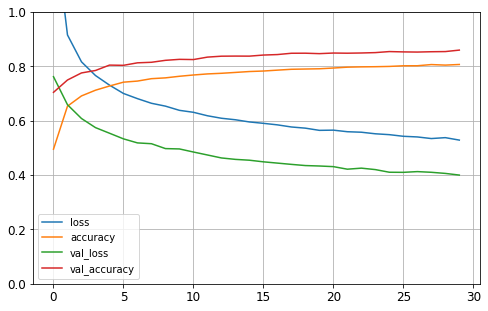

In [45]:

pd.DataFrame(history_dropout.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [28]:
model_dropout.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.4400 - accuracy: 0.8398


[0.44001615047454834, 0.8398000001907349]

In [46]:
#question 5
#the use of Use Batch Normalisation

from keras.layers import BatchNormalization
model_batchtnor = keras.models.Sequential()
model_batchtnor.add(keras.layers.Flatten(input_shape=[28, 28]))
BatchNormalization(),
model_batchtnor.add(keras.layers.Dense(300, activation="relu"))
BatchNormalization(),
model_batchtnor.add(keras.layers.Dense(100, activation="relu"))
BatchNormalization(),
model_batchtnor.add(keras.layers.Dense(10, activation="softmax"))
model_batchtnor.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_7 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [47]:
model_batchtnor.compile(loss="sparse_categorical_crossentropy", optimizer="SGD",metrics=["accuracy"])


In [48]:
history_batchtnor = model_batchtnor.fit(X_train, y_train, batch_size=32, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7123 - accuracy: 0.7685 - val_loss: 0.5098 - val_accuracy: 0.8226
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4852 - accuracy: 0.8309 - val_loss: 0.4443 - val_accuracy: 0.8500
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4418 - accuracy: 0.8456 - val_loss: 0.4215 - val_accuracy: 0.8560
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4139 - accuracy: 0.8554 - val_loss: 0.3936 - val_accuracy: 0.8680
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3940 - accuracy: 0.8622 - val_loss: 0.3751 - val_accuracy: 0.8698
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3782 - accuracy: 0.8664 - val_loss: 0.3635 - val_accuracy: 0.8750
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3641 - accuracy: 0.8704 - val_loss: 0.3652 - val_accuracy:

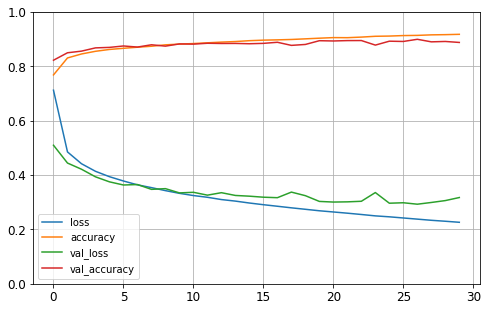

In [49]:

pd.DataFrame(history_batchtnor.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [99]:
#using MNIST — Digits dataset
digits = keras.datasets.mnist
(Xd_train_full, yd_train_full), (Xd_test, yd_test) = digits.load_data()

In [100]:
Xd_train_full.shape

(60000, 28, 28)

In [103]:

Xd_valid, Xd_train = Xd_train_full[:5000] / 255., Xd_train_full[5000:] / 255.
yd_valid, yd_train = yd_train_full[:5000], yd_train_full[5000:]
Xd_test = Xd_test / 255.

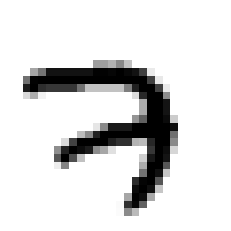

In [104]:
plt.imshow(Xd_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [105]:
modeldigits = keras.models.Sequential()
modeldigits.add(keras.layers.Flatten(input_shape=[28, 28]))
modeldigits.add(keras.layers.Dense(300, activation="relu"))
modeldigits.add(keras.layers.Dense(100, activation="relu"))
modeldigits.add(keras.layers.Dense(10, activation="softmax"))

In [106]:
modeldigits.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_30 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_31 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [107]:
modeldigits.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])

In [109]:
historydigits= modeldigits.fit(Xd_train, yd_train, batch_size=64, epochs=30,validation_data=(Xd_valid, yd_valid))

Epoch 1/30
860/860 [==============================] - 3s 4ms/step - loss: 0.8337 - accuracy: 0.7976 - val_loss: 0.3930 - val_accuracy: 0.8970
Epoch 2/30
860/860 [==============================] - 3s 4ms/step - loss: 0.3590 - accuracy: 0.9003 - val_loss: 0.2982 - val_accuracy: 0.9194
Epoch 3/30
860/860 [==============================] - 3s 4ms/step - loss: 0.2971 - accuracy: 0.9154 - val_loss: 0.2559 - val_accuracy: 0.9276
Epoch 4/30
860/860 [==============================] - 3s 4ms/step - loss: 0.2628 - accuracy: 0.9246 - val_loss: 0.2350 - val_accuracy: 0.9344
Epoch 5/30
860/860 [==============================] - 3s 4ms/step - loss: 0.2376 - accuracy: 0.9325 - val_loss: 0.2137 - val_accuracy: 0.9430
Epoch 6/30
860/860 [==============================] - 3s 4ms/step - loss: 0.2178 - accuracy: 0.9383 - val_loss: 0.1978 - val_accuracy: 0.9470
Epoch 7/30
860/860 [==============================] - 3s 4ms/step - loss: 0.2012 - accuracy: 0.9426 - val_loss: 0.1830 - val_accuracy: 0.9486
Epoch 

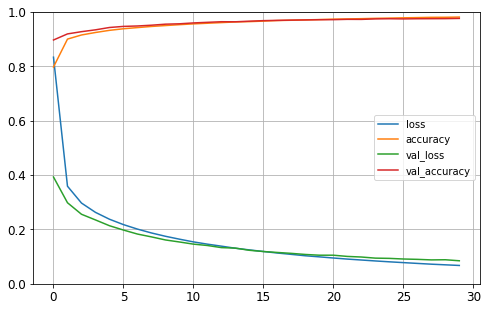

In [110]:
pd.DataFrame(historydigits.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [138]:
#using cifar10 dataset
cifar10 = keras.datasets.cifar10 
(Xc_train_full, yc_train_full), (Xc_test, yc_test) = cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


In [139]:
Xc_train_full.shape

(50000, 32, 32, 3)

In [141]:
Xc_valid, Xc_train = Xc_train_full[:5000] / 255., Xc_train_full[5000:] / 255.
yc_valid, yc_train = yc_train_full[:5000], yc_train_full[5000:]
Xc_test = Xc_test / 255.

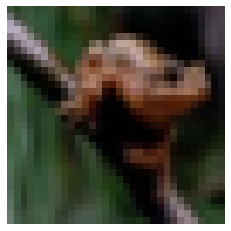

In [143]:
plt.imshow(Xc_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [155]:
classc_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [156]:
classc_names[y_train[0]]

'horse'

In [148]:
modelcifar10 = keras.models.Sequential()
modelcifar10.add(keras.layers.Flatten(input_shape=[28, 28]))
modelcifar10.add(keras.layers.Dense(300, activation="relu"))
modelcifar10.add(keras.layers.Dense(100, activation="relu"))
modelcifar10.add(keras.layers.Dense(10, activation="softmax"))

In [149]:
modelcifar10.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_39 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_40 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_41 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [151]:
modelcifar10.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])

In [153]:
historycifar10= modelcifar10.fit(Xd_train, yd_train, batch_size=64, epochs=100,validation_data=(Xc_valid, yc_valid))

Epoch 1/100
860/860 [==============================] - 3s 4ms/step - loss: 0.2731 - accuracy: 0.9229 - val_loss: 0.2427 - val_accuracy: 0.9342
Epoch 2/100
860/860 [==============================] - 3s 4ms/step - loss: 0.2464 - accuracy: 0.9306 - val_loss: 0.2242 - val_accuracy: 0.9390
Epoch 3/100
860/860 [==============================] - 3s 4ms/step - loss: 0.2256 - accuracy: 0.9366 - val_loss: 0.2047 - val_accuracy: 0.9434
Epoch 4/100
860/860 [==============================] - 3s 4ms/step - loss: 0.2085 - accuracy: 0.9411 - val_loss: 0.1905 - val_accuracy: 0.9468
Epoch 5/100
860/860 [==============================] - 3s 4ms/step - loss: 0.1940 - accuracy: 0.9453 - val_loss: 0.1784 - val_accuracy: 0.9514
Epoch 6/100
860/860 [==============================] - 3s 4ms/step - loss: 0.1807 - accuracy: 0.9495 - val_loss: 0.1701 - val_accuracy: 0.9552
Epoch 7/100
860/860 [==============================] - 3s 4ms/step - loss: 0.1695 - accuracy: 0.9523 - val_loss: 0.1623 - val_accuracy: 0.9562

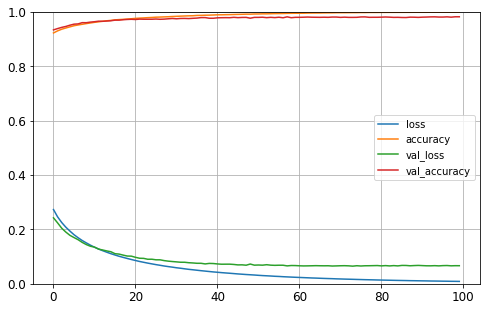

In [154]:
pd.DataFrame(historycifar10.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [119]:
#using diffrent dataset
#boston_housing dataset
boston_housing = keras.datasets.boston_housing

(Xh_train, yh_train), (Xh_test, yh_test) = boston_housing.load_data()

In [120]:
print(Xh_train[0], yh_train[0])

[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ] 15.2


In [121]:
Xh_train.shape

(404, 13)

In [122]:
Xh_train.dtype

dtype('float64')

In [126]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(Xh_train)
Xh_train_scaled = scaler.transform(Xh_train)
Xh_test_scaled = scaler.transform(Xh_test)

print(Xh_train_scaled[0])



[-0.27224633 -0.48361547 -0.43576161 -0.25683275 -0.1652266  -0.1764426
  0.81306188  0.1166983  -0.62624905 -0.59517003  1.14850044  0.44807713
  0.8252202 ]


In [127]:
modelhpricing = keras.models.Sequential()
modelhpricing.add( keras.layers.Dense(64, activation='relu', input_shape=[Xh_train_scaled.shape[1]]))
modelhpricing.add( keras.layers.Dense(64, activation='relu'))
modelhpricing.add( keras.layers.Dense(64, activation='relu'))
modelhpricing.add( keras.layers.Dense(1))


In [128]:

modelhpricing.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 64)                896       
_________________________________________________________________
dense_33 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_34 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 65        
Total params: 9,281
Trainable params: 9,281
Non-trainable params: 0
_________________________________________________________________
